In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data.csv", index_col=0)
data.shape

(165000, 31)

In [3]:
data.head()

,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,date,...,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
0,178,SÃO GONÇALO,237,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 00:00:00,2007-11-06,...,29.7,16.8,25.5,10.8,35,58,32,3.2,101,6.5
1,178,SÃO GONÇALO,237,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 01:00:00,2007-11-06,...,29.9,13.6,29.0,12.2,39,39,35,3.6,94,6.4
2,178,SÃO GONÇALO,237,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 02:00:00,2007-11-06,...,29.0,14.0,27.4,13.6,44,44,39,2.5,93,6.9
3,178,SÃO GONÇALO,237,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 03:00:00,2007-11-06,...,27.4,16.9,25.8,14.1,58,58,44,1.7,96,5.8
4,178,SÃO GONÇALO,237,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 04:00:00,2007-11-06,...,26.3,17.0,25.3,16.4,57,58,56,3.1,110,7.5


In [4]:
# check how many cities are in the dataset
print(data['wsid'].unique().tolist())
print(data['wsnm'].unique().tolist())
print(data['city'].unique().tolist())

[178, 303]
['SÃO GONÇALO', 'VITÓRIA']
['São Gonçalo', 'Vitória']


In [5]:
# check missing data from original dataset
data.isnull().sum()

wsid         0
wsnm         0
elvt         0
lat          0
lon          0
inme         0
city         0
prov         0
mdct         0
date         0
yr           0
mo           0
da           0
hr           0
prcp    144068
stp          0
smax         0
smin         0
gbrd     69056
temp         0
dewp         0
tmax         0
dmax         0
tmin         0
dmin         0
hmdy         0
hmax         0
hmin         0
wdsp     10133
wdct         0
gust      2506
dtype: int64

In [6]:
print("The missing fraction of prcp is {}".format(data['prcp'].isnull().sum() / len(data)))
print("The missing fraction of gbrd is {}".format(data['gbrd'].isnull().sum() / len(data)))
print("The missing fraction of wdsp is {}".format(data['wdsp'].isnull().sum() / len(data)))
print("The missing fraction of gust is {}".format(data['gust'].isnull().sum() / len(data)))

The missing fraction of prcp is 0.873139393939394
The missing fraction of gbrd is 0.4185212121212121
The missing fraction of wdsp is 0.06141212121212121
The missing fraction of gust is 0.015187878787878788


In [7]:
#split two cities into two datasets
df_SG = data.loc[data['city'] == 'São Gonçalo']
df_V = data.loc[data['city'] == 'Vitória']
print(df_SG.shape)
print(df_V.shape)

(78048, 31)
(86952, 31)


In [8]:
# check missing data fraction from df_SG dataset
df_SG.isnull().sum()/len(df_SG)

wsid    0.000000
wsnm    0.000000
elvt    0.000000
lat     0.000000
lon     0.000000
inme    0.000000
city    0.000000
prov    0.000000
mdct    0.000000
date    0.000000
yr      0.000000
mo      0.000000
da      0.000000
hr      0.000000
prcp    0.835627
stp     0.000000
smax    0.000000
smin    0.000000
gbrd    0.416667
temp    0.000000
dewp    0.000000
tmax    0.000000
dmax    0.000000
tmin    0.000000
dmin    0.000000
hmdy    0.000000
hmax    0.000000
hmin    0.000000
wdsp    0.129830
wdct    0.000000
gust    0.032108
dtype: float64

## minimally cleaning

In [9]:
# drop columns that are not related to weather
df_SG = df_SG.drop(df_SG.loc[:,'wsid':'prov'].head(0).columns, axis=1)
df_SG = df_SG.drop(df_SG.loc[:,'date':'hr'].head(0).columns, axis=1)

In [10]:
print(df_SG.shape)
df_SG.head()

(78048, 18)


,mdct,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
0,2007-11-06 00:00:00,NaN,982.5,982.5,981.3,NaN,29.3,12.1,29.7,16.8,25.5,10.8,35,58,32,3.2,101,6.5
1,2007-11-06 01:00:00,NaN,983.2,983.2,982.5,NaN,29.0,13.5,29.9,13.6,29.0,12.2,39,39,35,3.6,94,6.4
2,2007-11-06 02:00:00,NaN,983.5,983.5,983.2,NaN,27.4,14.0,29.0,14.0,27.4,13.6,44,44,39,2.5,93,6.9
3,2007-11-06 03:00:00,NaN,983.7,983.7,983.4,NaN,25.8,16.9,27.4,16.9,25.8,14.1,58,58,44,1.7,96,5.8
4,2007-11-06 04:00:00,NaN,983.7,983.8,983.6,NaN,25.4,16.4,26.3,17.0,25.3,16.4,57,58,56,3.1,110,7.5


In [11]:
df_SG.fillna(0, inplace=True)
df_SG.isnull().sum()

mdct    0
prcp    0
stp     0
smax    0
smin    0
gbrd    0
temp    0
dewp    0
tmax    0
dmax    0
tmin    0
dmin    0
hmdy    0
hmax    0
hmin    0
wdsp    0
wdct    0
gust    0
dtype: int64

## Predict with last 3 hours data

In [12]:
# box method(use mean value)
def SelectHours(a, newData3):
    Index = []
    for index, row in newData3.iterrows():
        Index.append(index)

    DF_x = []
    DF_y = []

    for index, row in newData3.iterrows():
        if index%1000 == 0:
            print(index)

        flag = 0
        for i in range(1, a+1):
            if index+i not in Index:
                flag = 1
                break
                
        if flag == 0:
            temp = newData3.loc[index, 'mdct']
            for j in ['stp', 'smax', 'smin', 'gbrd', 'temp', 'dewp' , 'tmax', 'dmax', 'tmin', 'dmin', 'hmdy', 'hmax', 'hmin', 'wdsp', 'wdct', 'gust']:
                Sum = 0
                for k in range(a):
                    Sum += newData3.loc[index+k, j]
                newData3.loc[index, j] = Sum/float(a)
            newData3.loc[index,'prcp'] = newData3.loc[index+3, 'prcp']

            if newData3.loc[index+3,'prcp'] == 0:
                DF_y.append(0)
            else:
                DF_y.append(1)

            DF_x.append(newData3.loc[newData3['mdct'] == temp]) #??
        else:
            continue
    
    DF_xx = pd.concat(DF_x, ignore_index = True)
    DF_xx['rain'] = DF_y
    
    return DF_xx

In [13]:
DF_xx3 = SelectHours(3, df_SG)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000


In [14]:
DF_xx3

,mdct,prcp,stp,smax,smin,gbrd,temp,dewp,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust,rain
0,2007-11-06 00:00:00,0.0,983.066667,983.066667,982.333333,0.000000,28.566667,13.200000,29.533333,14.800000,27.300000,12.200000,39.333333,47.000000,35.333333,3.100000,96.000000,6.600000,0
1,2007-11-06 01:00:00,0.0,983.466667,983.466667,983.033333,0.000000,27.400000,14.800000,28.766667,14.833333,27.400000,13.300000,47.000000,47.000000,39.333333,2.600000,94.333333,6.366667,0
2,2007-11-06 02:00:00,0.0,983.633333,983.666667,983.400000,0.000000,26.200000,15.766667,27.566667,15.966667,26.166667,14.700000,53.000000,53.333333,46.333333,2.433333,99.666667,6.733333,0
3,2007-11-06 03:00:00,0.0,983.700000,983.766667,983.533333,0.000000,25.000000,16.500000,26.366667,16.766667,24.966667,15.500000,59.000000,59.333333,52.333333,2.266667,101.666667,6.700000,0
4,2007-11-06 04:00:00,0.0,983.700000,983.766667,983.600000,0.000000,23.733333,16.433333,25.166667,16.700000,23.700000,16.200000,63.666667,64.000000,58.333333,2.133333,100.666667,6.400000,0
5,2007-11-06 05:00:00,0.0,984.000000,984.033333,983.633333,0.000000,21.833333,16.766667,23.733333,16.966667,21.766667,16.266667,73.333333,74.333333,63.666667,1.266667,116.333333,4.833333,0
6,2007-11-06 06:00:00,0.0,984.666667,984.666667,983.966667,0.000000,20.000000,17.133333,21.833333,17.266667,19.933333,16.566667,83.666667,85.000000,73.000000,0.600000,130.333333,3.066667,0
7,2007-11-06 07:00:00,0.0,985.666667,985.666667,984.666667,71.383000,20.300000,17.666667,21.533333,17.800000,18.666667,16.866667,84.666667,92.333333,77.333333,0.166667,182.000000,1.433333,0
8,2007-11-06 08:00:00,0.0,986.533333,986.533333,985.666667,400.709667,22.066667,17.566667,22.566667,18.000000,19.800000,17.000000,76.333333,88.000000,73.666667,1.100000,162.000000,2.566667,0
9,2007-11-06 09:00:00,0.0,657.966667,657.966667,657.466667,400.709667,15.966667,11.800000,16.000000,12.233333,13.700000,11.366667,45.333333,56.666667,45.333333,1.100000,115.000000,2.066667,0


## Train Models

### Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegressionCV
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

In [16]:
def logreg(DF_xx):
    # use SMOTE to handle imbalanced data
    features = ['stp', 'smax', 'smin', 'gbrd', 'temp', 'dewp' , 'tmax', 'dmax', 'tmin', 'dmin', 'hmdy', 'hmax', 'hmin', 'wdsp', 'wdct', 'gust']
    X = DF_xx[features]
    y = DF_xx['rain']
    sm = SMOTE(random_state=1)
    X_res, y_res = sm.fit_resample(X, y)
    print('Resampled dataset shape %s' % Counter(y_res))
    
    #train-test split
    X_train, X_test, Y_train, Y_test = train_test_split(X_res,y_res,test_size=0.3)
    print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
    
    # logistic regression
    logreg = LogisticRegressionCV(cv=5).fit(X_train,Y_train)
    Y_Pre = logreg.predict(X_test)
    Y_Pre_proba = logreg.predict_proba(X_test)[:,1]
    #print(Y_Pre)
    #print(Y_Pre_proba)
    print('Accuracy: %0.9f' % logreg.score(X_test,Y_test))
    
    #print the ROC curve
    fpr, tpr, thresholds = roc_curve(Y_test, Y_Pre_proba, pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.plot([1, 0], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    print(roc_auc)
    
    return

Resampled dataset shape Counter({0: 76024, 1: 76024})
(106433, 16) (45615, 16) (106433,) (45615,)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

Accuracy: 0.797939274


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


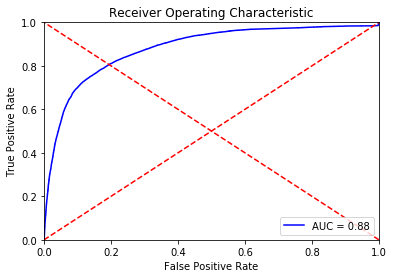

0.8800751834862407


In [17]:
logreg(DF_xx3)

### Linear Regression

In [18]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
def LinearReg(DF_xx):
    DF_xxx = DF_xx.drop(['rain'], axis=1)
    DF_new = DF_xxx
    #DF_new = DF_xxx[(DF_xxx['prcp'] != 0)]
    
    #select features with correlation's absolute value lager than 0.08
    features = ['smax','smin','dewp','dmax','wdsp','gust']
    X_linearReg = DF_new[features]
    y_linearReg = DF_new['prcp']
    
    #train-test split
    X_train, X_test, Y_train, Y_test = train_test_split(X_linearReg,y_linearReg,test_size=0.3)
    print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
    
    #train model
    regr = linear_model.LinearRegression()
    regr.fit(X_train, Y_train)
    Y_pred = regr.predict(X_test)

    # The mean squared error
    print("Mean squared error: %.2f"
          % mean_squared_error(Y_test, Y_pred))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(Y_test, Y_pred))
    
    return

In [20]:
LinearReg(DF_xx3)

(54631, 6) (23414, 6) (54631,) (23414,)
Mean squared error: 1.39
Variance score: 0.01
